In [1]:
# !pip uninstall tensorflow
import numpy as np
import os
import glob
import pandas as pd
import librosa
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing import image
from tensorflow.keras.models import load_model

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '-1' 

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 744130403852219766
xla_global_id: -1
]


In [4]:
# from keras import backend as K
# K.tensorflow_backend._get_available_gpus()
from tensorflow.python.client import device_lib
physical_devices = tf.config.list_physical_devices('GPU')
physical_devices

[]

In [5]:
path = os.path.expanduser('~')
path=os.path.join(path, "Documents", "courses", "MLSP", "Audio_Classification-MLSP", "Audio_Classification-MLSP")
data_path=os.path.join(path, "train")
label_path=path
data=pd.read_csv(os.path.join(label_path, "annotations.csv"))
# npy_files = glob.glob(os.path.join(data_path, "*.npy"))

In [6]:
audios=[]
i=0
files=data["fname"]
for file in files:
    arr=np.load(os.path.join(data_path, file))
    m,n,o=arr.shape
    arr.resize(n,o)
#     print(arr.shape)
    mel_spect = librosa.power_to_db(arr, ref=np.median)
    audios.append(mel_spect)
    i=i+1
features=audios

In [7]:
y=data['label']
y_=list(y)
for ind, i in enumerate(y):
    print(ind)
    y_.append(i)
y=np.array(y_)
y.shape

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

(2000,)

In [ ]:
# import librosa.display
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10, 4))
img = librosa.display.specshow(audios[0], x_axis='time', y_axis='mel', fmax=8000)
plt.savefig("out.png")
plt.show()

# Extracting High energy window features as described in report

In [9]:
def get_topFeatures(inp, num):
    if inp.shape[1] < num:
        inp=np.concatenate((inp, np.zeros((128, num-inp.shape[1]))), axis=1)
    features_ = np.sum(inp, axis=0)
    list_f = [[features_[i],i] for i in range(len(features_))]
    temp_f = sorted(list_f,key = lambda x:-x[0])
    temp_top_f = temp_f[:num]
    final_f = sorted(temp_top_f,key = lambda x:x[1])
    list_top_f = [inp[:,final_f[i][1]] for i in range(len(final_f))]
    return np.array(list_top_f).transpose()

In [10]:
for i in range(len(features)):
    features[i]=get_topFeatures(features[i], 128)
    print(features[i].shape)
final=features

(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)

(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)

In [11]:
from scipy.ndimage import gaussian_filter
def gauss(inp, var):
    return gaussian_filter(inp, var)
temp=features
for i in range(len(features)):
    print(i)
    temp.append(gauss(features[i], .6))
final=temp

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

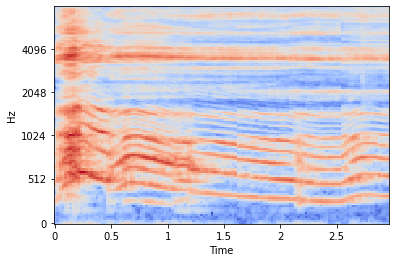

In [12]:
img = librosa.display.specshow(audios[55], x_axis='time', y_axis='mel', fmax=8000)


In [13]:
features=[]
for i, feat in enumerate(final):
    features.append(feat.reshape(1, feat.shape[0], feat.shape[1]))
#     print(features[i].shape)
len(features)

2000

In [14]:
# for i, feat in enumerate(final):
#     print(feat.shape)

In [15]:
i=0
for mat in features:
    features[i]= tf.convert_to_tensor(mat)
    i=i+1

In [16]:
X=np.array(features)
type(X)
print(X.shape)

(2000, 1, 128, 128)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

print(y_test.shape)
val_label=pd.Series(list(y_test))
val_label.value_counts()
# data={"val":y_test}
# ldf=pd.DataFrame(data, index=["label"])
# ldf["val"].value_counts()


(400,)


Crying_and_sobbing                       47
Bark                                     47
Siren                                    45
Meow                                     41
Doorbell                                 40
Microwave_oven                           39
Vehicle_horn_and_car_horn_and_honking    38
Knock                                    36
Shatter                                  34
Walk_and_footsteps                       33
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
test_encoder = LabelEncoder()
test_ = test_encoder.fit_transform(y_test)
to_onehot=to_categorical(test_)
y_test=to_onehot
train_encoder = LabelEncoder()
train_ = train_encoder.fit_transform(y_train)
to_onehot=to_categorical(train_)
y_train=to_onehot

#  Flattening of validation and testing inputs

In [19]:
from sklearn.cluster import KMeans
from scipy import fft
gmm_inp=[]
for inp in X_train:
    inp=fft.dct(inp)
#     print(inp.shape)
#     inp=np.reshape(inp, inp.shape[1], inp.shape[2])
    inp=inp[:, 0:128,:]
    print(inp.shape)
    inp=np.reshape(inp, inp.shape[1]*inp.shape[2])
    gmm_inp.append(inp)

(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 12

(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 12

(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 128, 128)
(1, 12

In [20]:
gmm_chk=[]
for inp in X_test:
    inp=fft.dct(inp)
    inp=inp[:, 0:128,:]
    inp=np.reshape(inp, inp.shape[1]*inp.shape[2])
    print(inp.shape)
    gmm_chk.append(inp)

(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(16384,)
(

In [21]:
inp=np.array(gmm_inp)
inp.shape

(1600, 16384)

In [22]:
chk=np.array(gmm_chk)

In [23]:
# n_clusters = 10
# n_epochs = 50     
# clusters, likelihoods, scores, sample_likelihoods, history = train_gmm(inp, n_clusters, n_epochs)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(inp, y_train)

KNeighborsClassifier(n_neighbors=1)

In [36]:
history=neigh.predict(chk)

In [37]:

from keras import backend as K
from sklearn.metrics import precision_score , recall_score
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [38]:
print(precision_m(history, y_test))
print(recall_m(history, y_test))
print(f1_m(history, y_test))

tf.Tensor(0.9825, shape=(), dtype=float32)
tf.Tensor(0.9825, shape=(), dtype=float32)
tf.Tensor(0.98249996, shape=(), dtype=float32)


In [39]:
def compute_accuracy(y_true, y_pred):
    correct_predictions = sum([1 for i in range(len(y_true)) if np.all(y_true[i]==y_pred[i])])
    accuracy = correct_predictions/len(y_true)
    return accuracy

In [41]:
compute_accuracy(y_test, history)
pred=history


[8 5 9 6 3 7 9 3 7 5 1 5 4 8 0 9 4 8 7 5 1 6 0 2 0 8 4 2 3 1 2 8 9 1 8 9 0
 0 7 9 4 9 6 3 0 9 9 6 4 6 8 4 8 0 4 6 7 4 2 1 7 2 5 8 7 9 7 3 7 4 5 1 6 6
 7 9 7 8 8 2 6 8 1 7 1 3 0 7 0 5 1 7 7 1 3 9 5 1 6 8 2 8 3 1 5 0 0 7 2 9 4
 0 4 4 2 1 7 6 5 8 9 3 4 0 5 2 1 6 9 0 1 0 1 6 3 1 0 1 9 1 4 4 3 1 2 8 4 1
 2 2 0 5 3 4 7 6 1 4 7 0 5 7 0 8 0 4 9 3 8 5 6 1 2 6 8 4 9 2 1 8 0 3 0 2 3
 7 4 0 5 7 4 9 6 2 0 9 8 2 1 7 8 6 2 4 8 5 0 0 0 4 3 3 3 9 8 9 1 0 9 5 8 1
 6 2 3 2 5 3 8 0 3 3 7 4 7 9 1 2 0 5 0 8 3 1 7 7 0 4 5 2 2 7 8 2 5 1 1 2 9
 3 1 2 6 9 5 7 9 3 2 7 8 0 5 3 9 0 8 8 2 1 6 2 6 0 0 1 1 4 9 7 3 6 4 6 6 8
 6 7 5 5 1 0 4 7 9 3 5 2 1 4 9 2 0 4 8 6 2 5 6 3 8 2 3 1 0 0 7 0 4 2 7 5 0
 0 7 5 4 7 5 6 4 0 9 7 2 1 3 8 0 9 1 1 7 9 8 5 8 1 7 7 4 6 5 2 5 5 7 4 8 6
 7 7 9 4 7 2 9 2 0 7 4 4 3 3 6 4 3 5 9 5 4 1 1 7 4 1 2 1 0 5]
[8 5 9 6 3 7 6 3 7 5 1 5 4 8 0 9 4 8 7 5 1 6 0 2 0 8 4 2 3 1 2 8 9 1 8 9 0
 0 7 9 4 3 6 3 0 9 9 6 4 6 8 4 8 0 4 6 7 4 2 1 7 2 5 8 7 3 7 3 7 4 5 1 6 6
 7 9 7 8 8 2 6 8 1 7 1 3 0 7 0 5 1 7 7

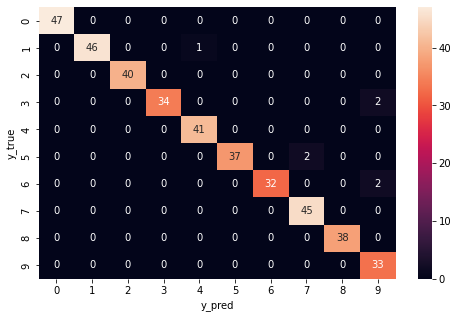

In [42]:
# pred = model.predict(X_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)
predictions_index = np.argmax(pred, axis=1)
print(predictions_index)
y_true = np.argmax(y_test, axis=1)
print(y_true)
cf = confusion_matrix(y_true, predictions_index)
print('confusion matrix')
print(cf)
    #confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
# accuracy
print("Accuracy:", compute_accuracy(y_true, y_pred))